# Valores habitacionais nos bairros de Boston

## Atributos

1 CRIM: taxa de criminalidade per capita por cidade <br>
2 ZN: Proporção de terrenos residenciais destinados a lotes com mais de 25.000 pés quadrados <br>
3 INDUS: Proporção de acres comerciais não varejistas por cidade <br>
4 CHAS: variável fictícia de Charles River (= 1 se o trecho delimita rio; 0 caso contrário) <br>
5 NOX: concentração de óxido nítrico (partes por 10 milhões) <br>
6 RM: Numero médio de quartos por habitação <br>
7 AGE: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940 <br>
8 DIS: distâncias ponderadas para cinco centros de emprego de Boston <br>
9 RAD: Indice de acessibilidade para rodovias radiais <br>
10 FAX: taxa de imposto sobre propriedades de valor integral por US 10.000 <br>
11 PTRATIO: Proporção de alunos por professor por cidade <br>
12 B: 1000 (Bk - 0,63) 2, onde Bk é a proporção de pessoas africanas Descida americana pela cidade <br>
13 LSTAT: Porcentagem de menor status da população <br>
14 MEDV: Valor mediano de residências ocupadas pelo proprietário em US $ 1.000 <br>

In [237]:
import pandas as pd
import numpy as np
from sklearn import datasets
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt

In [6]:
boston_data = datasets.load_boston()

In [19]:
features = boston_data.data
price = boston_data.target

In [46]:
X = pd.DataFrame(features, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
Y = pd.DataFrame(price, columns=['MEDV'])

In [268]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']] = scaler_x.fit_transform(X [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])
scaler_y = MinMaxScaler()
Y [['MEDV']] = scaler_y.fit_transform(Y [['MEDV']])

In [269]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


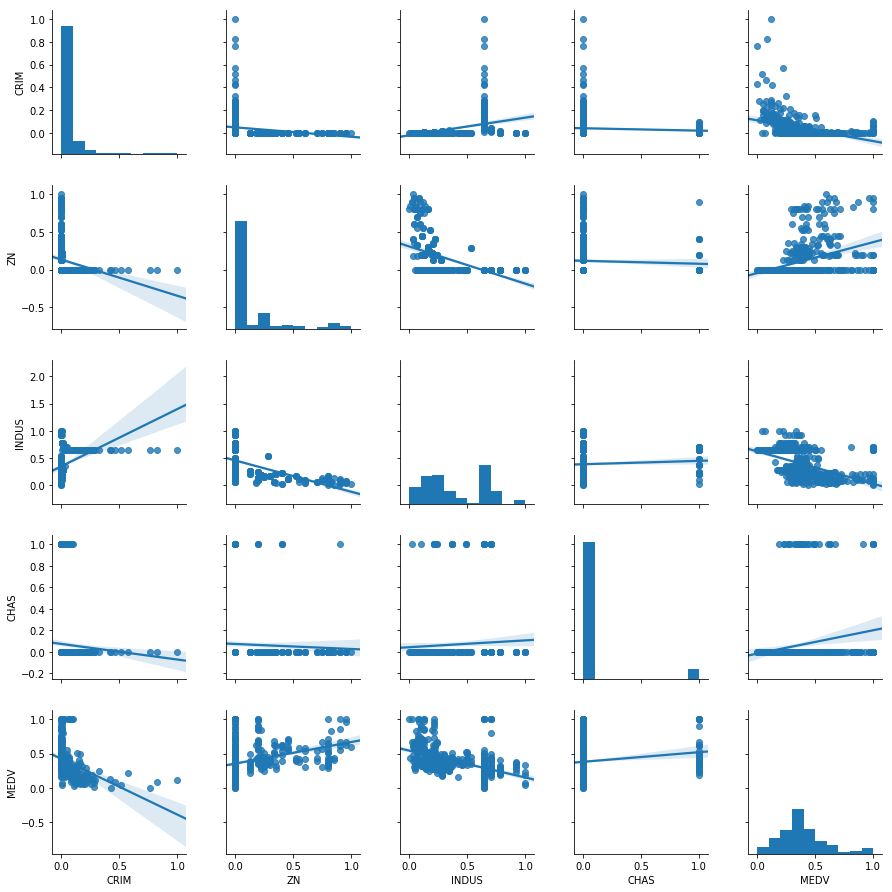

In [181]:
import seaborn as sns
result = pd.concat([X,Y], axis=1, join='outer', ignore_index=False)
sns.pairplot(result, vars=[ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV'], kind= 'reg', size=2.5)
plt.tight_layout()
plt.show()

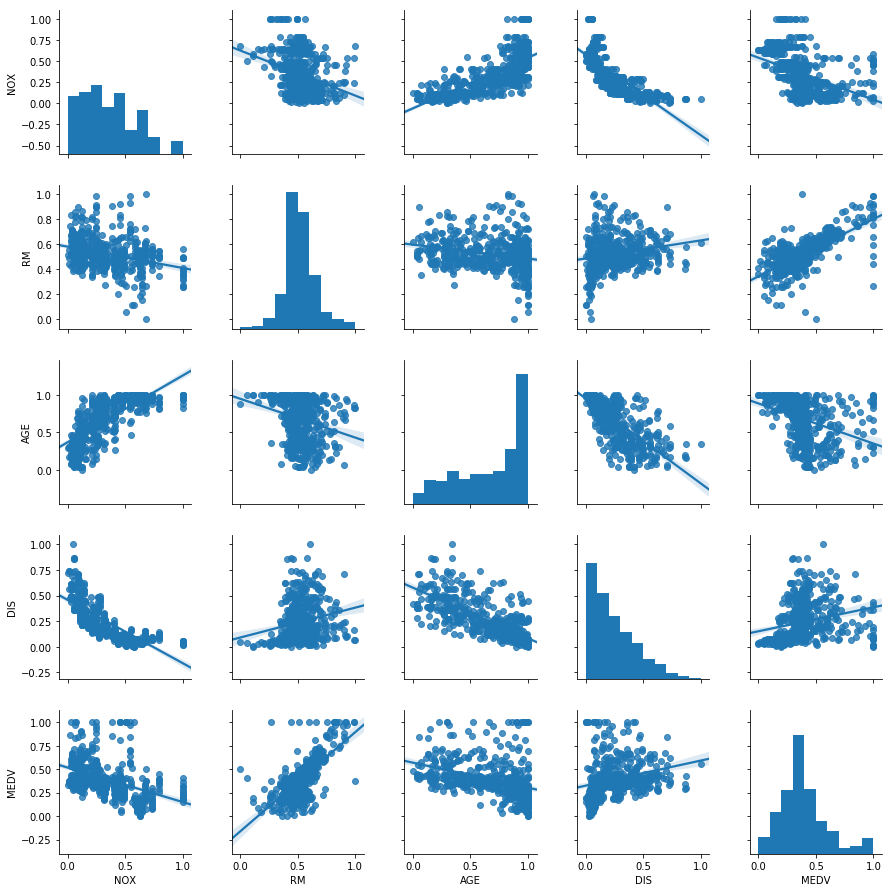

In [179]:
sns.pairplot(result, vars=['NOX', 'RM', 'AGE', 'DIS','MEDV'],kind= 'reg', size=2.5)
plt.tight_layout()
plt.show()

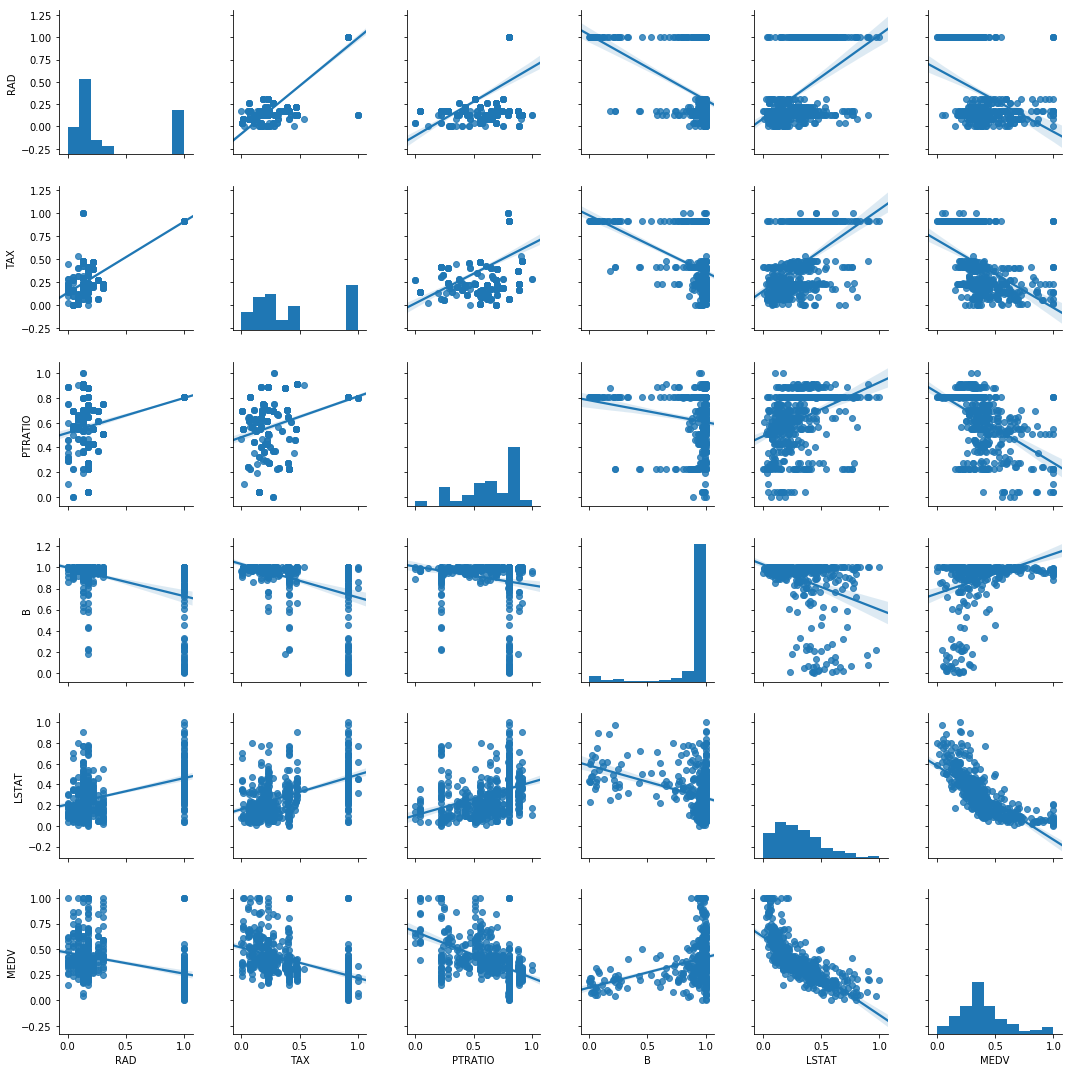

In [182]:
sns.pairplot(result, vars=['RAD','TAX', 'PTRATIO', 'B', 'LSTAT','MEDV'], kind= 'reg', size=2.5, )
plt.tight_layout()
plt.show()

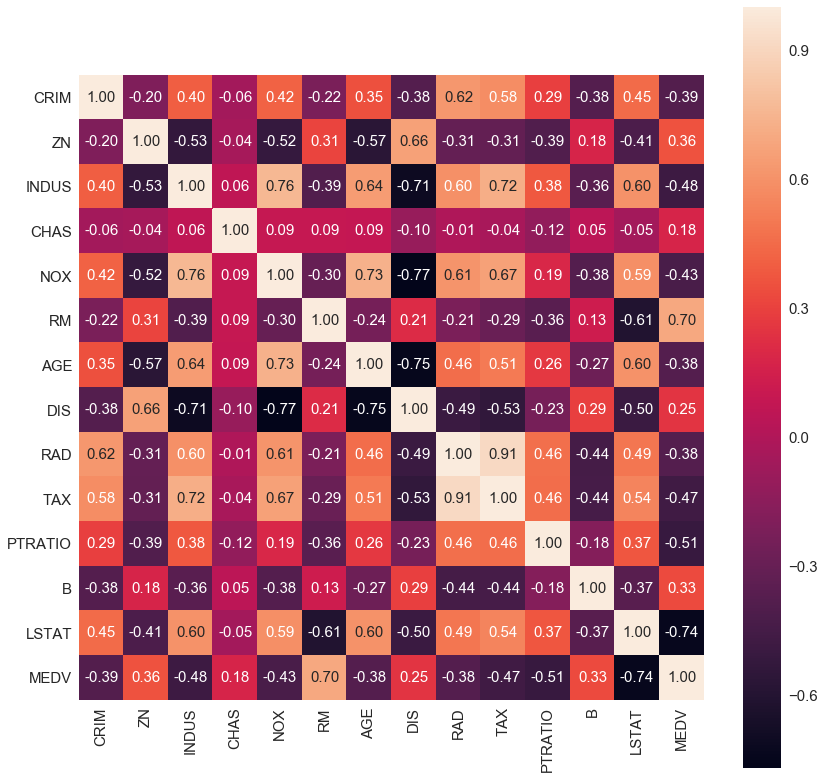

In [207]:
plt.figure(figsize=(14,14))
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [294]:
base = datasets.load_boston()
X = base['data']
Y = base['target']

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=36)


In [354]:
grad = GradientBoostingRegressor()
grad.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [371]:
from joblib import dump, load
dump(grad, 'gradB.joblib')
grad2 = load('gradB.joblib')

In [355]:
r2_train = grad.score(X_train, y_train)
r2_test = grad.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.98
R2 no set de teste: 0.88


In [360]:
y_pred = grad.predict(X)

In [361]:
print ('for Train: %.2f' % grad.score(X_train, y_train) )
print ('for Test: %.2f' % grad.score(X_test, y_test) )

for Train: 0.98
for Test: 0.88


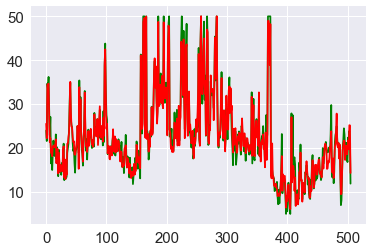

In [376]:
plt.plot(Y, color = 'green' )
plt.plot(y_pred, color = 'red')

In [340]:
X_train3, X_test3, y_train3, y_tes3t = train_test_split(X, Y, test_size = 0.20, random_state=22)

In [341]:
from sklearn.linear_model import LinearRegression

In [343]:
reg = LinearRegression()
reg.fit(X_train3, y_train3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [373]:
r_train = reg.score(X_train3, y_train3)
r_test = reg.score(X_test3, y_tes3t)
print('Regression no set de treino: %.2f' % r_train)
print('Regression no set de teste: %.2f' % r_test)

Regression no set de treino: 0.73
Regression no set de teste: 0.77


In [372]:
dump(reg, 'reg.joblib')

['reg.joblib']

In [345]:
y3_pred = reg.predict(X)

In [374]:
mse = mean_squared_error(Y, y3_pred)
mse

22.182824004248292

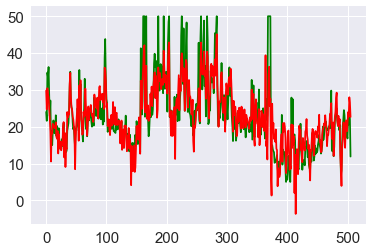

In [377]:
plt.plot(Y, color = 'green' )
plt.plot(y3_pred, color = 'red')

In [378]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y, y3_pred))

In [379]:
rms


4.709864542027541